신경망 모델 훈련

In [1]:
# 실행할때마다 동일한 경과를 얻기위해서 랜덤시드를 사용
import tensorflow as tf
tf.keras.utils.set_random_seed(42)
tf.config.experimental.enable_op_determinism()

손실 곡선

In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(X_train,y_train),(X_test,y_test) =  keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


In [3]:
X_train_scaled =  X_train / 255.0
X_train,X_val,y_train,y_val =  train_test_split(X_train_scaled,y_train,test_size=0.2, random_state=42)

In [4]:
def model_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10,activation='softmax'))
  return model

In [47]:
model = model_fn()
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_18 (Dense)            (None, 100)               78500     
                                                                 
 dense_19 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train,y_train,epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.5311 - accuracy: 0.8112
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3908 - accuracy: 0.8588
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3541 - accuracy: 0.8723
Epoch 4/5
1500/1500 [==============================] - 5s 4ms/step - loss: 0.3307 - accuracy: 0.8810
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3135 - accuracy: 0.8873


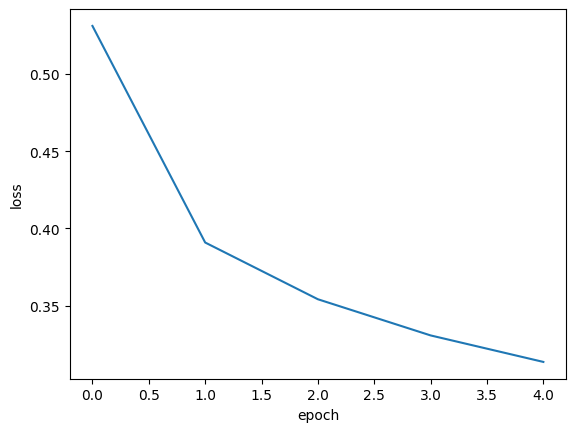

In [14]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

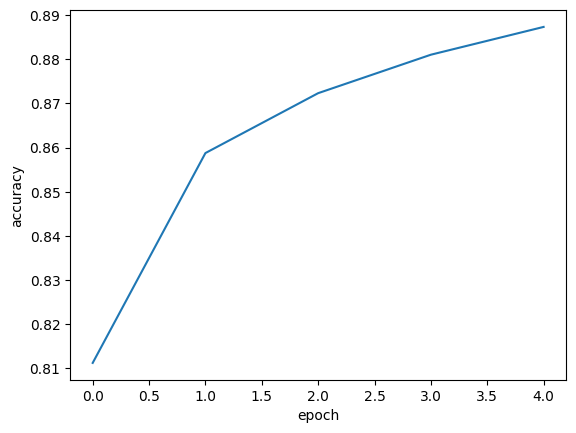

In [16]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

학습을 20번 한다음 손실곡선과 accuracy 곡선을 함께 그려보기

In [18]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_val, y_val))

Epoch 1/20
1200/1200 [==============================] - 5s 4ms/step - loss: 1.7821 - accuracy: 0.4803 - val_loss: 1.2625 - val_accuracy: 0.6237
Epoch 2/20
1200/1200 [==============================] - 4s 3ms/step - loss: 1.0754 - accuracy: 0.6512 - val_loss: 0.9282 - val_accuracy: 0.6915
Epoch 3/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.8531 - accuracy: 0.7114 - val_loss: 0.7844 - val_accuracy: 0.7278
Epoch 4/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.7465 - accuracy: 0.7369 - val_loss: 0.7029 - val_accuracy: 0.7490
Epoch 5/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6895 - accuracy: 0.7491 - val_loss: 0.6603 - val_accuracy: 0.7557
Epoch 6/20
1200/1200 [==============================] - 5s 5ms/step - loss: 0.6527 - accuracy: 0.7604 - val_loss: 0.6287 - val_accuracy: 0.7679
Epoch 7/20
1200/1200 [==============================] - 4s 3ms/step - loss: 0.6250 - accuracy: 0.7684 - val_loss: 0.6067 - val_accuracy:

In [21]:
# train, val
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

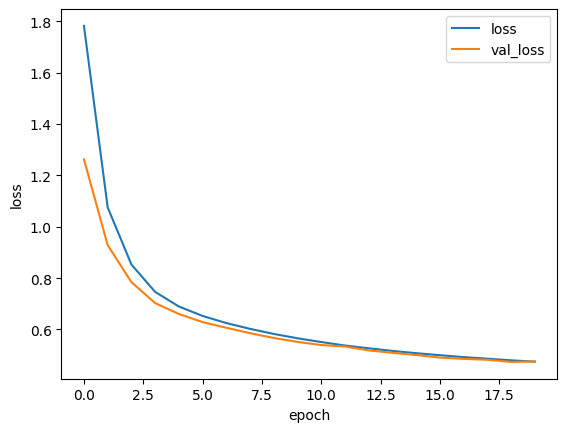

In [22]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

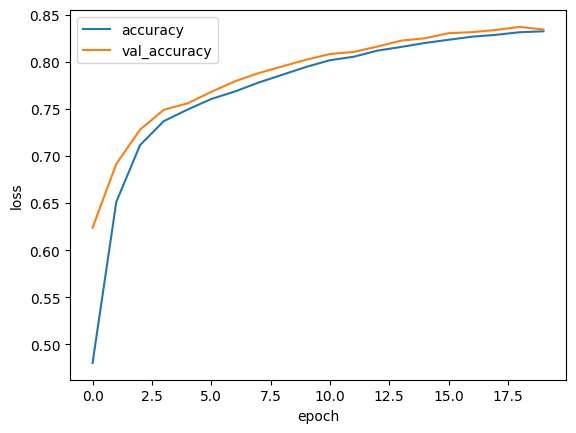

In [23]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

옵티마이져 사용 - adam

In [26]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_val, y_val))

Epoch 1/20
1200/1200 [==============================] - 6s 4ms/step - loss: 1.3391 - accuracy: 0.5936 - val_loss: 0.8632 - val_accuracy: 0.7217
Epoch 2/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.7617 - accuracy: 0.7374 - val_loss: 0.6835 - val_accuracy: 0.7553
Epoch 3/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6542 - accuracy: 0.7632 - val_loss: 0.6200 - val_accuracy: 0.7756
Epoch 4/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.6021 - accuracy: 0.7815 - val_loss: 0.5745 - val_accuracy: 0.7976
Epoch 5/20
1200/1200 [==============================] - 5s 4ms/step - loss: 0.5676 - accuracy: 0.7962 - val_loss: 0.5479 - val_accuracy: 0.8065
Epoch 6/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.5424 - accuracy: 0.8056 - val_loss: 0.5266 - val_accuracy: 0.8140
Epoch 7/20
1200/1200 [==============================] - 4s 4ms/step - loss: 0.5227 - accuracy: 0.8143 - val_loss: 0.5094 - val_accuracy:

In [ ]:
# loss , accuracy 시각화

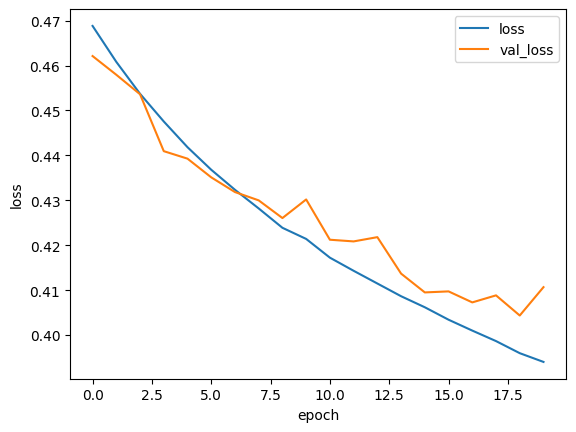

In [25]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

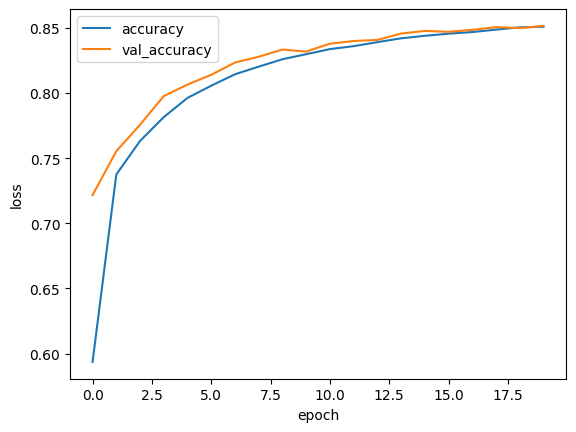

In [27]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_val, y_val))


Epoch 1/30
1200/1200 [==============================] - 5s 4ms/step - loss: 1.3226 - accuracy: 0.6123 - val_loss: 0.8492 - val_accuracy: 0.7252
Epoch 2/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.7480 - accuracy: 0.7400 - val_loss: 0.6706 - val_accuracy: 0.7566
Epoch 3/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.6417 - accuracy: 0.7667 - val_loss: 0.6070 - val_accuracy: 0.7839
Epoch 4/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.5892 - accuracy: 0.7867 - val_loss: 0.5611 - val_accuracy: 0.8033
Epoch 5/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.5539 - accuracy: 0.8024 - val_loss: 0.5338 - val_accuracy: 0.8144
Epoch 6/30
1200/1200 [==============================] - 4s 4ms/step - loss: 0.5282 - accuracy: 0.8130 - val_loss: 0.5133 - val_accuracy: 0.8210
Epoch 7/30
1200/1200 [==============================] - 5s 4ms/step - loss: 0.5085 - accuracy: 0.8199 - val_loss: 0.4968 - val_accuracy:

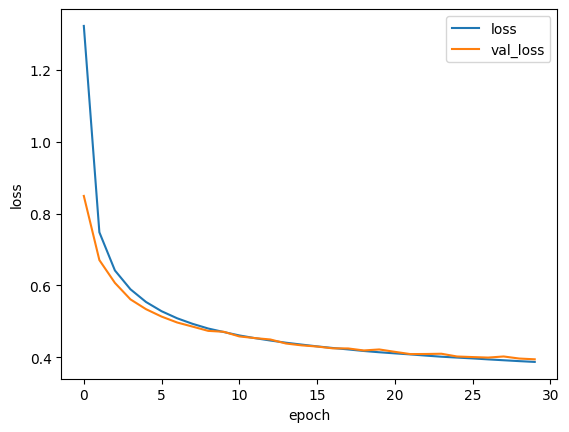

In [29]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

과적합
  - 드랍아웃
    - 일부뉴런의 가중치를 0으로 즉 학습을 막는다..

In [5]:
model = model_fn(keras.layers.Dropout(0.5))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79510 (310.59 KB)
Trainable params: 79510 (310.59 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(X_train,y_train,epochs=20,validation_data=(X_val, y_val))

Epoch 1/20
1500/1500 [==============================] - 9s 3ms/step - loss: 0.6632 - accuracy: 0.7672 - val_loss: 0.4412 - val_accuracy: 0.8430
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4968 - accuracy: 0.8232 - val_loss: 0.4023 - val_accuracy: 0.8534
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4640 - accuracy: 0.8323 - val_loss: 0.3886 - val_accuracy: 0.8576
Epoch 4/20
1500/1500 [==============================] - 6s 4ms/step - loss: 0.4400 - accuracy: 0.8417 - val_loss: 0.3691 - val_accuracy: 0.8662
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4265 - accuracy: 0.8448 - val_loss: 0.3675 - val_accuracy: 0.8623
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4147 - accuracy: 0.8492 - val_loss: 0.3513 - val_accuracy: 0.8718
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4092 - accuracy: 0.8515 - val_loss: 0.3614 - val_accuracy:

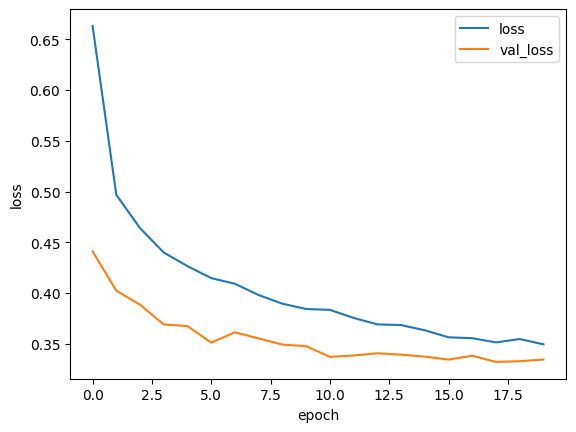

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [43]:
import numpy as np

np.mean(X_train,axis=(1,2)), np.std(X_train,axis=(1,2))

(array([0.00100813, 0.00196076, 0.00101917, ..., 0.00070972, 0.00086042,
        0.00101496]),
 array([0.00145623, 0.00174497, 0.00139834, ..., 0.00129774, 0.00111153,
        0.00081831]))

모델저장

In [11]:
model.save_weights('model-weight.keras')

In [12]:
model.save('model-whole.keras')

In [13]:
!ls -l *.keras

-rw-r--r-- 1 root root 333144 Feb 26 12:02 model-weight.keras
-rw-r--r-- 1 root root 979656 Feb 26 12:02 model-whole.keras


불러오기
  - 전체 불러오기

In [14]:
model = keras.models.load_model('model-whole.keras')
model.evaluate(X_train,y_train)

1500/1500 [==============================] - 4s 3ms/step - loss: 0.2634 - accuracy: 0.9003


[0.2634163796901703, 0.9002500176429749]

가중치 불러와서 적용하기
  - 저장한 시점의 모델구조와 동일한 모델을 만들고 가중치를 로드한다.

In [24]:
import numpy as np
model = model_fn(keras.layers.Dropout(0.5))
model.load_weights('model-whole.keras')
y_pred = model.predict(X_test)
np.mean(np.argmax(y_pred,axis=-1) == y_test)

313/313 [==============================] - 0s 1ms/step


0.8464

콜백
  - 검증 손실(validation loss)가 가장 낮은 때만 저장
  - 전체모델이 저장된다

In [25]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb  = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
model.fit(X_train,y_train,epochs=20,validation_data=(X_val,y_val), callbacks=[checkpoint_cb])

Epoch 1/20
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5885 - accuracy: 0.7926 - val_loss: 0.4271 - val_accuracy: 0.8431
Epoch 2/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4375 - accuracy: 0.8422 - val_loss: 0.3776 - val_accuracy: 0.8654
Epoch 3/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4026 - accuracy: 0.8540 - val_loss: 0.3693 - val_accuracy: 0.8655
Epoch 4/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3819 - accuracy: 0.8606 - val_loss: 0.3487 - val_accuracy: 0.8744
Epoch 5/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3670 - accuracy: 0.8659 - val_loss: 0.3480 - val_accuracy: 0.8738
Epoch 6/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3504 - accuracy: 0.8716 - val_loss: 0.3341 - val_accuracy: 0.8788
Epoch 7/20
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3435 - accuracy: 0.8750 - val_loss: 0.3339 - val_accuracy:

In [26]:
model = keras.models.load_model('best-model.keras')
model.evaluate(X_val,y_val)

375/375 [==============================] - 1s 2ms/step - loss: 0.3209 - accuracy: 0.8842


[0.3209039568901062, 0.8842499852180481]

In [27]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 62.7681 - accuracy: 0.8536


[62.768070220947266, 0.853600025177002]

콜벡
  - 조기종료
  - 예를들어서 100번 반복학습하는데.. 대략 40번에서 최고의 성능을 나타내고 그이후 상황이 더 안좋아질때.. 알아서 40번에서 학습을 끝냄

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics='accuracy')
checkpoint_cb  = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
earlyStop_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)  # 최상의 검증 손실을 갖는 에포크에서 모델 가중치가 복원
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val), callbacks=[checkpoint_cb, earlyStop_cb])

Epoch 1/50
1500/1500 [==============================] - 7s 4ms/step - loss: 0.5956 - accuracy: 0.7893 - val_loss: 0.4265 - val_accuracy: 0.8464
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4412 - accuracy: 0.8424 - val_loss: 0.3849 - val_accuracy: 0.8610
Epoch 3/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4092 - accuracy: 0.8513 - val_loss: 0.3741 - val_accuracy: 0.8633
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3862 - accuracy: 0.8590 - val_loss: 0.3555 - val_accuracy: 0.8729
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3699 - accuracy: 0.8642 - val_loss: 0.3603 - val_accuracy: 0.8674
Epoch 6/50
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3569 - accuracy: 0.8691 - val_loss: 0.3442 - val_accuracy: 0.8724
Epoch 7/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3491 - accuracy: 0.8720 - val_loss: 0.3378 - val_accuracy:

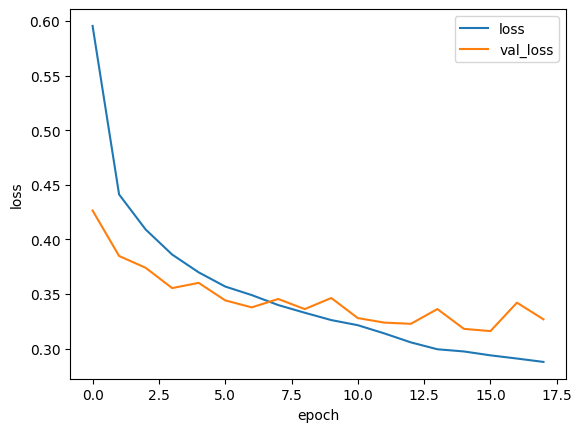

In [29]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [30]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 4ms/step - loss: 59.5426 - accuracy: 0.8535


[59.54257583618164, 0.8535000085830688]

대회문데

다층 퍼셉트론
  - 완전연결 신경망으로 이루어진 모델

In [ ]:
!unzip '/content/drive/MyDrive/데이콘/웹로그기반조회수예측.zip'
import pandas as pd
df = pd.read_csv('/content/open/train.csv')
X = df.loc[:,'browser':]
y = df['TARGET']
test_df = pd.read_csv('/content/open/test.csv')
test_df = test_df[ X.columns]
# # 전처리 - 최빈값으로 전처리
# temp = X.isna().mean()
# for na_obj_col in temp[temp>0].index:
#   X[na_obj_col] = X[na_obj_col].fillna(X[na_obj_col].mode()[0])

# temp = test_df.isna().mean()
# for na_obj_col in temp[temp>0].index:
#   test_df[na_obj_col] = test_df[na_obj_col].fillna(test_df[na_obj_col].mode()[0])

# 전처리 - 임이의 빈 값으로 전처리
temp = X.isna().mean()
for na_obj_col in temp[temp>0].index:
  X[na_obj_col] = X[na_obj_col].fillna('na')

temp = test_df.isna().mean()
for na_obj_col in temp[temp>0].index:
  test_df[na_obj_col] = test_df[na_obj_col].fillna('na')

# 2.전처리 - object를 수치형으로 변경
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

object_colunms = X.select_dtypes(include=['object']).columns
# 학습용데이터를 기준으로 라벨인코딩을하는데 검증용데이터중에 추가되는 범주형 데이터가 있으면 라벨인코더에 추가한다
import numpy as np
for colname in object_colunms:
  le.fit(X[colname])
  X[colname] = le.transform(X[colname])

  for case_ in np.unique(test_df[colname]):
    if case_ not in le.classes_:
      le.classes_ = np.append(le.classes_,case_)

  test_df[colname]  =  le.transform(test_df[colname])

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(X)
X_scaled = ss.transform(X)
X_test_scaled = ss.transform(test_df)

In [34]:
np.save("train.npy", X_scaled)
np.save("y.npy", y)

In [35]:
X_sacled = np.load("train.npy")
y = np.load("y.npy")

In [45]:
X_sacled.shape

(252289, 16)

완전연결 신경망 : 다층퍼셉트론

In [48]:
def model_reg_fn(a_layer = None):
  model = keras.Sequential()
  model.add(keras.layers.Dense(64, activation='relu', input_shape = (16,)) )
  model.add(keras.layers.Dense(32, activation='relu') )
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(1))
  return model

In [50]:
model = model_reg_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_38 (Dense)            (None, 64)                1088      
                                                                 
 dense_39 (Dense)            (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_40 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [51]:
X_train.shape,X_val.shape

((189216, 16), (63073, 16))

In [52]:
X_train,X_val,y_train,y_val =  train_test_split(X_sacled,y)
model.compile(optimizer='adam', loss='mean_squared_error',metrics='mse')
checkpoint_cb  = keras.callbacks.ModelCheckpoint('best-model.keras', save_best_only=True)
earlyStop_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)  # 최상의 검증 손실을 갖는 에포크에서 모델 가중치가 복원
X_train.shape, y_train.shape

((189216, 16), (189216,))

In [53]:
X_val.shape,y_val.shape

((63073, 16), (63073,))

In [ ]:
history = model.fit(X_train,y_train,epochs=50,validation_data=(X_val,y_val), callbacks=[checkpoint_cb, earlyStop_cb])

Epoch 1/50
5913/5913 [==============================] - 25s 4ms/step - loss: 11.1764 - mse: 11.1764 - val_loss: 9.7056 - val_mse: 9.7056
Epoch 2/50
5913/5913 [==============================] - 19s 3ms/step - loss: 9.2241 - mse: 9.2241 - val_loss: 9.4120 - val_mse: 9.4120
Epoch 3/50
  42/5913 [..............................] - ETA: 14s - loss: 6.7686 - mse: 6.7686

In [ ]:
best_model = keras.load_model('best-model.keras')
best_model.evaluate(X_val,y_val)

In [ ]:
predict = best_model.predict(X_test_scaled)
submission_df = pd.read_csv('/content/open/sample_submission.csv')
submission_df['TARGET'] = predict
submission_df.to_csv("제출.csv",index=False)